In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
dataset = pd.read_csv("/home/naman/Desktop/Titanic.csv",delimiter=',',verbose = True)

Tokenization took: 0.61 ms
Type conversion took: 2.08 ms
Parser memory cleanup took: 0.01 ms


This dataset is Titanic's dataset. It contains data of all the passengers like passenger class,gender,age,whether they survived after the boat sank.

We will be using various parameters to decide whether a person survives or not after the boat sank!


In [3]:
data = dataset[["Sex","Pclass","Survived"]] #Only columns needed
data = data.dropna()   #dropping rows with missing values

In [4]:
#splitting into training and test data
train = data.sample(frac=0.8,random_state=200)
test = data.drop(train.index)

# Taking the outputs into array named label
label = train['Survived']
train = train.drop("Survived",axis = 1)


Let's explore the data a bit.
The ratio of yes-no decides imbalence of a class. If the data is skewed we need weighted classes!

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
def makebarplot(data,cols):
    addtn = len(cols)%3
    if addtn > 0:
        addtn = 1
    sub1 = len(cols)//3 + addtn 
    sub2 = 3
    fig = plt.figure()
    for index,i in enumerate(cols):
        item = data[i].unique()
        X = np.array(range(len(item)))
        Y = [data.groupby(i)[i].count()[j] for j in item]
        ax = fig.add_subplot(sub1,sub2,index+1)
        ax.bar(X,Y,align = 'center')
        plt.setp(ax,xticks=X, xticklabels=item,xlabel = i)

<IPython.core.display.Javascript object>


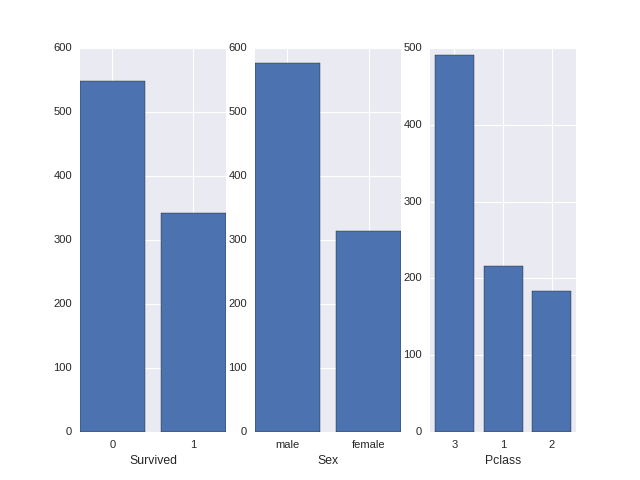

In [58]:
makebarplot(data,["Survived","Sex",'Pclass'])

In [8]:
def makestackedplot(data,cols,target,noofcolsplot = 3):
    addtn = len(cols)%3
    if addtn > 0:
        addtn = 1
    sub1 = len(cols)//3 + addtn 
    sub2 = 3
    fig = plt.figure()
    for index,i in enumerate(cols):
        item = data[i].unique()
        X = np.array(range(len(item)))
        classes = data[target].unique()
        Y = np.zeros((classes.shape[0],item.shape[0]))
        
        for ind,targetlabel in enumerate(classes):
            Y[ind] = [(data[(data[i] == value) & (data[target] == targetlabel)]).shape[0] for value in item]
        
        ax = fig.add_subplot(sub1,sub2,index+1)
        ax.bar(X,Y[0,:],color = 'r',align = 'center')
        ax.bar(X,Y[1,:],color = 'b',bottom = Y[0,:],align = 'center')
        plt.setp(ax,xticks=X, xticklabels=item,xlabel = i)

<IPython.core.display.Javascript object>


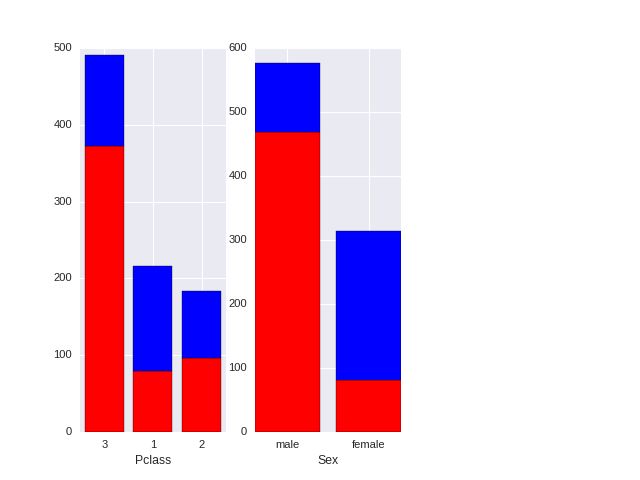

In [57]:
makestackedplot(data,["Pclass","Sex"],"Survived")

Naive Bayes for classification is a probabilistic algorithm. It is based on Bayes probability theorem which states that 
$P(A|B) = \frac{P(A and B)}{P(B)}$

We take the prior probabilities of labels and conditional probabilities of each feature w.r.t. label.
Then the probability of a new data point $<A,B,C> = P(A|Label1)*P(B|Label1)*P(C|Label1)*P(Label1)$ for label1
and $= P(A|Label2)*P(B|Label2)*P(C|Label2)*P(Label2)$


In [19]:
#Defining meta variables
target = "Survived"
classes = data[target].unique()
featurenames = np.array(["Sex","Pclass"])
#calculating prior
prior = data.groupby(target)[target].count()/len(data)
prior

Survived
0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [50]:
#calculating likelihood
pcount = data.groupby(target)[target].count()
likelihood = list(range(featurenames.shape[0]))

for index,feature in enumerate(featurenames):
    categories = data[feature].unique()
    temp = np.zeros((classes.shape[0],categories.shape[0]))

    for ind,targetlabel in enumerate(classes):
        temp[ind] = [(data[(data[feature] == value) & (data[target] == targetlabel)]).shape[0] for value in categories]
        likelihood[index] = temp / pcount[:,None]
likelihood

[array([[ 0.85245902,  0.14754098],
        [ 0.31871345,  0.68128655]]),
 array([[ 0.67759563,  0.14571949,  0.17668488],
        [ 0.34795322,  0.39766082,  0.25438596]])]

In [53]:
#Calculating posterior for a new dataset <male,2>
genderis = "male"
pclassis = 2
indexofmale = np.where(data["Sex"].unique() == genderis)[0]       #function gives tuple. First occurance at index 0
indexof2 = np.where(data["Pclass"].unique() == pclassis)[0]
posterior0 = prior[0] * likelihood[0][0,indexofmale]*likelihood[1][0,indexof2]
posterior1 = prior[1] * likelihood[0][1,indexofmale]*likelihood[1][1,indexof2]

In [56]:
if posterior0 >posterior1:
    print "Human won't survive"
else:
    print "Human will survive"

Human won't survive
